# 🏡 King County House Price Prediction

This project analyzes house sale prices in King County (including Seattle) for the period of **May 2014 to May 2015**. The goal was to determine which property features have the greatest impact on house prices and to build a machine learning model capable of predicting sale prices.

### 🏠 Dataset Feature Description

| **Feature** | **Description** |
|--------------|-----------------|
| `id` | Unique numeric identifier assigned to each house being sold. |
| `date` | Date on which the house was sold. |
| `price` | Price of the house — this is the **target variable**. All other columns are features. |
| `bedrooms` | Number of bedrooms in the house. |
| `bathrooms` | Number of bathrooms in the house. |
| `sqft_living` | Living area of the house in square feet. |
| `sqft_lot` | Lot size in square feet. |
| `floors` | Total number of floors (levels) in the house. |
| `waterfront` | Indicates whether the house has a waterfront view (`0` = No, `1` = Yes). |
| `view` | Indicates whether the house has been viewed (`0` = No, `1` = Yes). |
| `condition` | Overall condition of the house (scale: 1–5). |
| `grade` | Overall grade of the house based on King County grading system (scale: 1–11). |
| `sqft_above` | Square footage of the house excluding the basement. |
| `sqft_basement` | Square footage of the basement. |
| `yr_built` | Year the house was originally built. |
| `yr_renovated` | Year the house was last renovated. |
| `zipcode` | Zip code of the house location. |
| `lat` | Latitude coordinate of the house. |
| `long` | Longitude coordinate of the house. |
| `sqft_living15` | Living area (in sq. ft.) measured in 2015 — may include renovations. |
| `sqft_lot15` | Lot size (in sq. ft.) measured in 2015 — may include renovations. |

## 1. Importing Libraries and Loading the Dataset

In [1]:

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Machine Learning - Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Machine Learning - Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Importing Dataset + parsing dates 
df = pd.read_csv(r'C:\Users\jgest\Desktop\IRONHACK\projects\LinearRegression\king_ country_ houses_aa.csv',parse_dates=['date'])

## 2. Data Exploration
### Understanding the structure, features, target variable, shape, and data types

In [3]:
# Dataset overview
df.shape

(21613, 21)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [6]:
# Statistical summary
round(df.describe().T,1)

,count,mean,min,25%,50%,75%,max,std
id,21613.0,4580301520.864988,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0,2876565571.312049
date,21613,2014-10-29 04:38:01.959931648,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,21613.0,540088.141767,75000.0,321950.0,450000.0,645000.0,7700000.0,367127.196483
bedrooms,21613.0,3.370842,0.0,3.0,3.0,4.0,33.0,0.930062
bathrooms,21613.0,2.114757,0.0,1.75,2.25,2.5,8.0,0.770163
sqft_living,21613.0,2079.899736,290.0,1427.0,1910.0,2550.0,13540.0,918.440897
sqft_lot,21613.0,15106.967566,520.0,5040.0,7618.0,10688.0,1651359.0,41420.511515
floors,21613.0,1.494309,1.0,1.0,1.5,2.0,3.5,0.539989
waterfront,21613.0,0.007542,0.0,0.0,0.0,0.0,1.0,0.086517
view,21613.0,0.234303,0.0,0.0,0.0,0.0,4.0,0.766318


In [7]:
# Target variable distribution
print("Target Variable (Price) Distribution:")
print("="*80)
print(df['price'].describe())
print(f"\nSkewness: {df['price'].skew():.2f}")
print(f"Kurtosis: {df['price'].kurtosis():.2f}")

Target Variable (Price) Distribution:
count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Skewness: 4.02
Kurtosis: 34.59


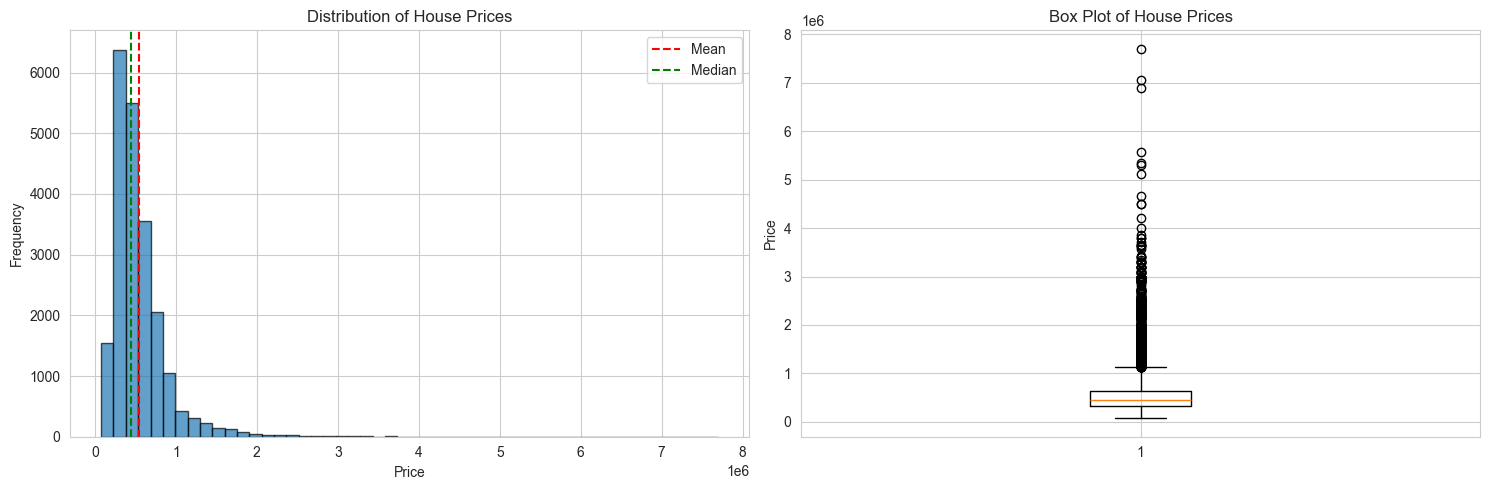

In [8]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of House Prices')
axes[0].axvline(df['price'].mean(), color='red', linestyle='--', label='Mean')
axes[0].axvline(df['price'].median(), color='green', linestyle='--', label='Median')
axes[0].legend()

# Box plot
axes[1].boxplot(df['price'], vert=True)
axes[1].set_ylabel('Price')
axes[1].set_title('Box Plot of House Prices')

plt.tight_layout()
plt.show()

## 3. Data preprocessing

In [9]:
# Looking for duplicated data
df.duplicated().sum()

0

In [10]:
# Cheking for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
# Drop id col

# Drop date column? Lets do some eda first!

In [12]:
# Creating year and month columns 
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

In [13]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


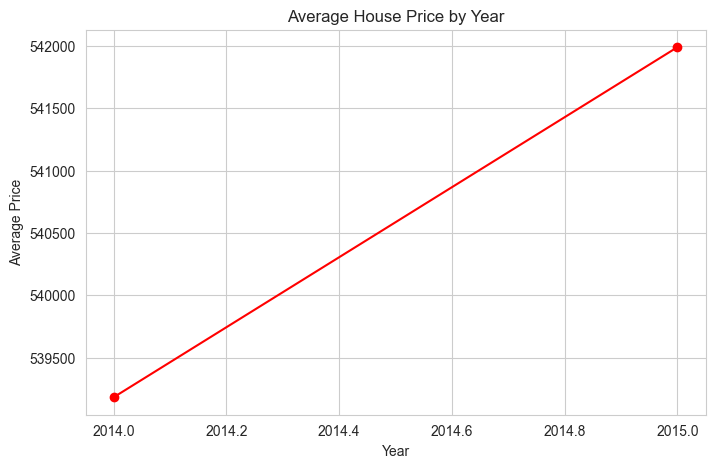

In [14]:
# Price over year visualization
avg_price_by_year = df.groupby("year")["price"].mean()

plt.figure(figsize=(8,5))
avg_price_by_year.plot(marker="o", color="red")
plt.title("Average House Price by Year")
plt.ylabel("Average Price")
plt.xlabel("Year")
plt.show()

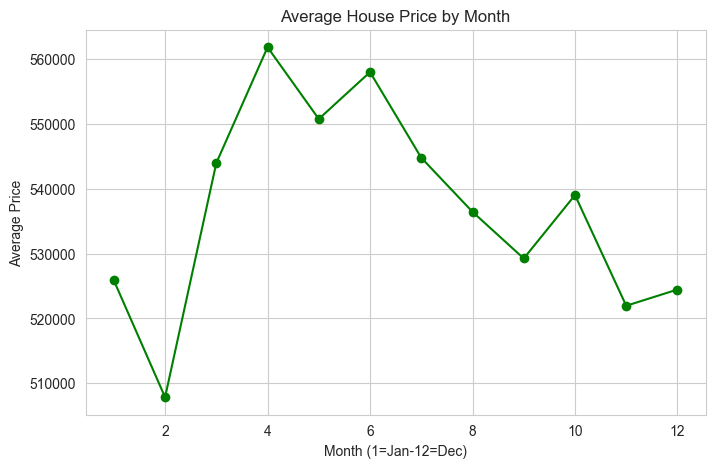

In [15]:
# Price over month visualization
avg_price_by_month = df.groupby("month")["price"].mean()

plt.figure(figsize=(8,5))
avg_price_by_month.plot(marker="o", color="green")
plt.title("Average House Price by Month")
plt.ylabel("Average Price")
plt.xlabel("Month (1=Jan-12=Dec)")
plt.show()

The time variable in this dataset, which spans for 1 year, is not a significant factor in predicting house prices. Property values typically remain relatively stable over such a short period unless influenced by exceptional circumstances. EDA supports this assumption, confirming that the date column can be safely dropped from the model.

In [16]:
# Dropping id, date year and month columns. Displaying our cleanned data
data = df.drop(columns=["date","id","year","month"])
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
# New data shape
data.shape

(21613, 19)

In [18]:
# Check for zero values in key columns
print("Checking for zero/unusual values in key columns:")
print("="*80)
print(f"Bedrooms = 0: {(data['bedrooms'] == 0).sum()}")
print(f"Bathrooms = 0: {(data['bathrooms'] == 0).sum()}")
print(f"Sqft_living = 0: {(data['sqft_living'] == 0).sum()}")
print(f"Price = 0: {(data['price'] == 0).sum()}")

Checking for zero/unusual values in key columns:
Bedrooms = 0: 13
Bathrooms = 0: 10
Sqft_living = 0: 0
Price = 0: 0


In [19]:
# Remove rows with problematic values (if any)
data = data[(data['price'] > 0) & 
                    (data['bedrooms'] > 0) & 
                    (data['bathrooms'] > 0) & 
                    (data['sqft_living'] > 0)]

print(f"Shape after removing problematic values: {data.shape}")

Shape after removing problematic values: (21597, 19)


## 4. Splitting Dataset into Features (X) and Target (y)

In [20]:
features = data.drop(columns='price')

target = data['price']

### Explorring correlations 

In [21]:
# Correlation between tarjet and features

corr_target = data.corr()['price'].sort_values(ascending=False)
print(corr_target)

price            1.000000
sqft_living      0.701909
grade            0.667922
sqft_above       0.605371
sqft_living15    0.585247
bathrooms        0.525905
view             0.397318
sqft_basement    0.323776
bedrooms         0.308794
lat              0.306777
waterfront       0.266437
floors           0.256814
yr_renovated     0.126415
sqft_lot         0.089882
sqft_lot15       0.082837
yr_built         0.053984
condition        0.036025
long             0.022092
zipcode         -0.053437
Name: price, dtype: float64


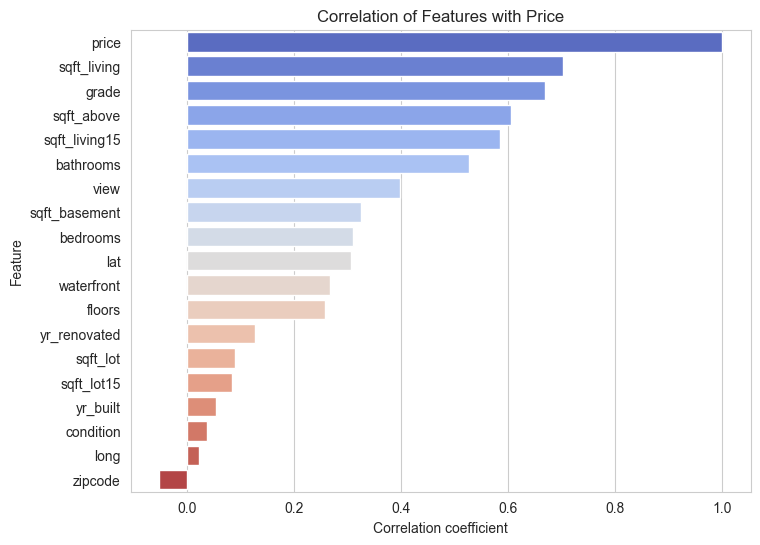

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm')
plt.title("Correlation of Features with Price")
plt.xlabel("Correlation coefficient")
plt.ylabel("Feature")
plt.show()

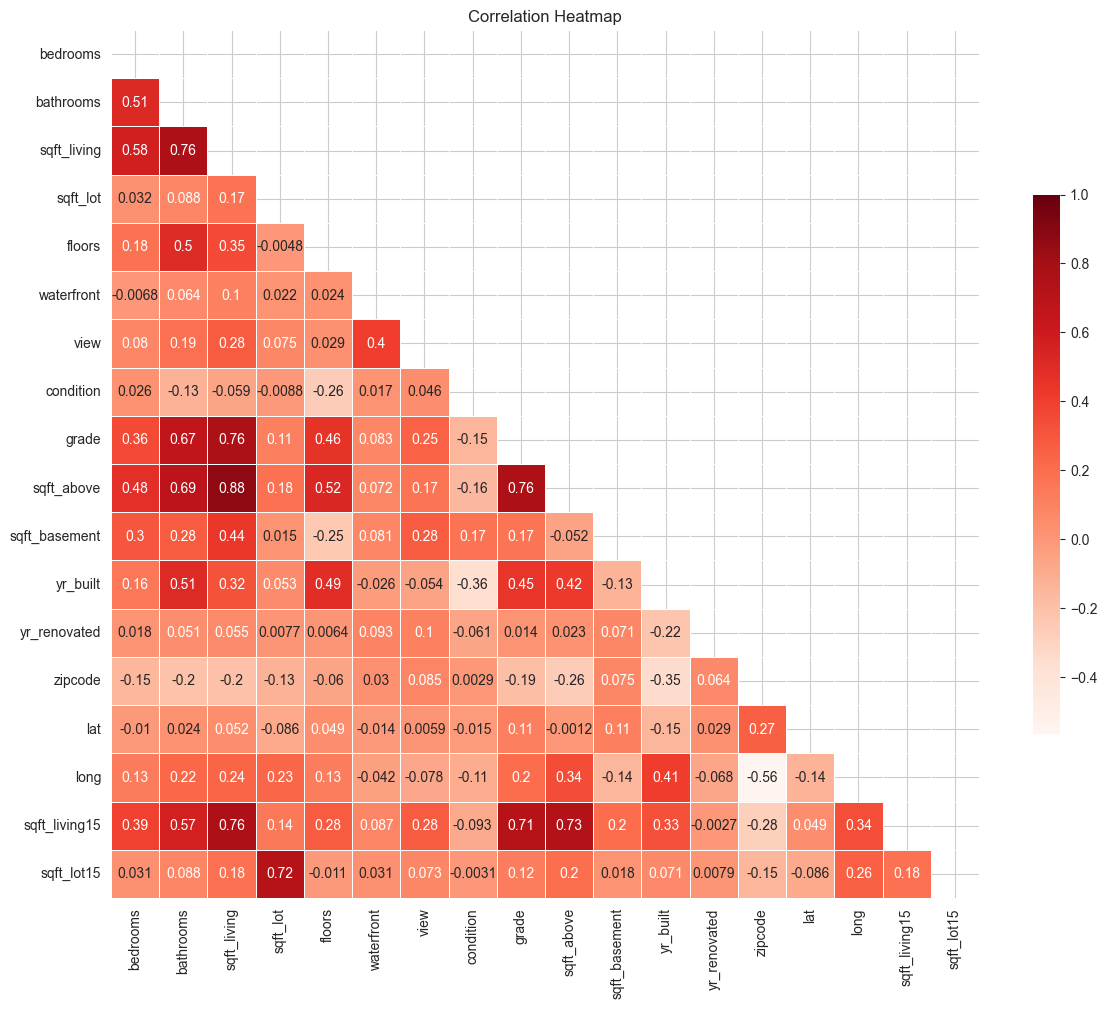

In [23]:
# Correlation between features 

corrX = features.corr()

mask = np.triu(np.ones_like(corrX, dtype=bool))

plt.figure(figsize=(14,14))
sns.heatmap(corrX, mask=mask, vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corrX, cmap="Reds")
plt.title("Correlation Heatmap")
plt.show()

Multicollinearity Concerns:**
- **sqft_living** and **sqft_above** are highly correlated (0.88) - may need to address

## 6. Handle Categorical Variables
### Encoding categorical features

In [24]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
# Cheking zipcode column
data['zipcode'].value_counts

<bound method IndexOpsMixin.value_counts of 0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 21597, dtype: int64>

In [26]:
# Encoding Zipcode
le = LabelEncoder()
data['zipcode_encoded'] = le.fit_transform(data['zipcode'])

data.head()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zipcode_encoded
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,66
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,55
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,16
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,58
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,37


In [27]:
# Encoded df

df_encoded = data.drop(columns='zipcode')
df_encoded.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_encoded
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,66
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,55
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,16
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,58
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,37


## 7. Train Baseline Models
### Linear Regression - KNN Regressor - Random Forest - Xgboost

In [28]:
X = df_encoded.drop(columns='price')
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train and evaluate a regression model
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    print(f"\n{'='*80}")
    print(f"{model_name}")
    print(f"{'='*80}")
    print(f"Training R² Score: {train_r2:.4f}")
    print(f"Testing R² Score:  {test_r2:.4f}")
    print(f"Training MSE:     ${train_rmse:,.2f}")
    print(f"Testing MSE:      ${test_rmse:,.2f}")
    print(f"Training MAE:      ${train_mae:,.2f}")
    print(f"Testing MAE:       ${test_mae:,.2f}")
    
    return {
        'Model': model_name,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Train_MSE': train_rmse,
        'Test_MSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae
    }

In [30]:
# Initialize results storage
results = []

# Baseline Model 1: Linear Regression
lr_model = LinearRegression()
lr_results = evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Linear Regression")
results.append(lr_results)


Linear Regression
Training R² Score: 0.7026
Testing R² Score:  0.6924
Training MSE:     $201,072.45
Testing MSE:      $200,028.49
Training MAE:      $126,232.50
Testing MAE:       $125,556.33


In [31]:
# Baseline Model 2: KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_results = evaluate_model(knn_model, X_train, X_test, y_train, y_test, "KNN Regressor (k=5)")
results.append(knn_results)


KNN Regressor (k=5)
Training R² Score: 0.6729
Testing R² Score:  0.4951
Training MSE:     $210,873.22
Testing MSE:      $256,284.23
Training MAE:      $128,884.70
Testing MAE:       $157,102.51


In [32]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_results = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")
results.append(rf_results)


Random Forest
Training R² Score: 0.9822
Testing R² Score:  0.8817
Training MSE:     $49,137.41
Testing MSE:      $124,059.08
Training MAE:      $26,240.51
Testing MAE:       $67,901.75


In [33]:
# XGBoost Regressor
xgb_model = XGBRegressor()
xgb_results = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")
results.append(xgb_results)


XGBoost
Training R² Score: 0.9764
Testing R² Score:  0.8644
Training MSE:     $56,624.80
Testing MSE:      $132,813.59
Training MAE:      $40,376.41
Testing MAE:       $66,672.99


## 8. Model Evaluation Summary

In [34]:
# Create results dataframe
results_df = pd.DataFrame(results)
print("\nBaseline Model Comparison:")
print("="*80)
print(results_df)


Baseline Model Comparison:
                 Model  Train_R2   Test_R2      Train_MSE       Test_MSE  \
0    Linear Regression  0.702600  0.692443  201072.448289  200028.489722   
1  KNN Regressor (k=5)  0.672902  0.495123  210873.215628  256284.229543   
2        Random Forest  0.982239  0.881696   49137.409766  124059.084732   
3              XGBoost  0.976414  0.864410   56624.802167  132813.590138   

       Train_MAE       Test_MAE  
0  126232.501021  125556.327788  
1  128884.695422  157102.505926  
2   26240.513933   67901.749889  
3   40376.406112   66672.994967  


## 9. Model Improvement
### Data Side: Handle outliers, multicollinearity, feature selection, normalization
### Model Side: Try ensemble methods and hyperparameter tuning

### 9.1 Outlier Detection and Handling

In [35]:
# Detect outliers using IQR method
def detect_outliers_iqr(df_encoded, column):
    Q1 = df_encoded[column].quantile(0.25)
    Q3 = df_encoded[column].quantile(0.75)
    IQR = Q3 - Q1 #interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_encoded[(df_encoded[column] < lower_bound) | (df_encoded[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("Outlier Detection for Key Features:")
print("="*80)
for col in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']:
    n_outliers, lower, upper = detect_outliers_iqr(df_encoded, col)
    print(f"{col:20s}: {n_outliers:5d} outliers (bounds: {lower:,.0f} - {upper:,.0f})")

Outlier Detection for Key Features:
price               :  1145 outliers (bounds: -162,500 - 1,129,500)
bedrooms            :   530 outliers (bounds: 2 - 6)
bathrooms           :   561 outliers (bounds: 1 - 4)
sqft_living         :   571 outliers (bounds: -250 - 4,230)
sqft_lot            :  2419 outliers (bounds: -3,428 - 19,152)


In [36]:
# Remove extreme outliers in price (keep reasonable range)
# We'll be conservative and only remove extreme outliers
Q1_price = df_encoded['price'].quantile(0.01)
Q3_price = df_encoded['price'].quantile(0.99)

df_no_outliers = df_encoded[(df_encoded['price'] >= Q1_price) & (df_encoded['price'] <= Q3_price)]

print(f"Original dataset size: {len(df_encoded)}")
print(f"After removing price outliers: {len(df_no_outliers)}")
print(f"Removed: {len(df_encoded) - len(df_no_outliers)} rows ({((len(df_encoded) - len(df_no_outliers))/len(df_encoded)*100):.2f}%)")

Original dataset size: 21597
After removing price outliers: 21166
Removed: 431 rows (2.00%)


### 9.2 Feature Engineering

In [37]:
# Create new features
df_featured = df_no_outliers.copy()

# 1. Age of house
df_featured['house_age'] = 2015 - df_featured['yr_built']

# 2. Years since renovation (0 if never renovated)
df_featured['years_since_renovation'] = df_featured['yr_renovated'].apply(
    lambda x: 2015 - x if x > 0 else 0
)

# 3. Was renovated (binary)
df_featured['was_renovated'] = (df_featured['yr_renovated'] > 0).astype(int)

# 4. Total square footage
df_featured['total_sqft'] = df_featured['sqft_living'] + df_featured['sqft_lot']

# 5. Bathroom to bedroom ratio
df_featured['bath_per_bed'] = df_featured['bathrooms'] / df_featured['bedrooms']

# 6. Living space ratio
df_featured['living_lot_ratio'] = df_featured['sqft_living'] / df_featured['sqft_lot']

# 7. Price per sqft (for analysis - won't use in features)
df_featured['price_per_sqft'] = df_featured['price'] / df_featured['sqft_living']

# 8. Is luxury house (price > $650K)
df_featured['is_luxury'] = (df_featured['price'] >= 650000).astype(int)

print("New features created:")
print("- house_age")
print("- years_since_renovation")
print("- was_renovated")
print("- total_sqft")
print("- bath_per_bed")
print("- living_lot_ratio")
print("- price_per_sqft")
print("- is_luxury")

New features created:
- house_age
- years_since_renovation
- was_renovated
- total_sqft
- bath_per_bed
- living_lot_ratio
- price_per_sqft
- is_luxury


### 9.3 Prepare Improved Dataset

In [38]:
df_featured.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_encoded,house_age,years_since_renovation,was_renovated,total_sqft,bath_per_bed,living_lot_ratio,price_per_sqft,is_luxury
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,66,60,0,0,6830,0.333333,0.208850,188.050847,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,55,64,24,1,9812,0.750000,0.354874,209.338521,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,16,82,0,0,10770,0.500000,0.077000,233.766234,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,58,50,0,0,6960,0.750000,0.392000,308.163265,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,37,28,0,0,9760,0.666667,0.207921,303.571429,0


In [39]:
# Preparing features and target with new features
features_to_use = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                   'waterfront', 'view', 'condition', 'grade', 'sqft_above', 
                   'sqft_basement', 'yr_built', 'zipcode_encoded', 'lat', 'long',
                   'sqft_living15', 'sqft_lot15', 'house_age', 'years_since_renovation',
                   'was_renovated', 'total_sqft', 'bath_per_bed', 'living_lot_ratio']

X_improved = df_featured[features_to_use]
y_improved = df_featured['price']

print(f"Improved feature set shape: {X_improved.shape}")

Improved feature set shape: (21166, 23)


### 9.4 Feature Scaling

In [40]:
# Split the improved dataset
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_improved, y_improved, test_size=0.2, random_state=42
)

# Scale the features using RobustScaler (better for outliers)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)

# Convert back to DataFrame to maintain feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_imp.columns, index=X_train_imp.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_imp.columns, index=X_test_imp.index)

print("Features scaled using RobustScaler")

Features scaled using RobustScaler


### 9.5 Improved Models

In [41]:
# Test improved baseline models with scaled data
lr_improved = LinearRegression()
lr_imp_results = evaluate_model(lr_improved, X_train_scaled, X_test_scaled, 
                                 y_train_imp, y_test_imp, "Linear Regression (Improved)")
results.append(lr_imp_results)


Linear Regression (Improved)
Training R² Score: 0.7166
Testing R² Score:  0.7155
Training MSE:     $150,286.62
Testing MSE:      $153,431.27
Training MAE:      $105,114.79
Testing MAE:       $107,058.30


In [42]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5,
                                 min_samples_leaf=2, random_state=42, n_jobs=-1)
rf_results = evaluate_model(rf_model, X_train_imp, X_test_imp, 
                            y_train_imp, y_test_imp, "Random Forest (Improved)")
results.append(rf_results)


Random Forest (Improved)
Training R² Score: 0.9693
Testing R² Score:  0.8679
Training MSE:     $49,435.35
Testing MSE:      $104,570.15
Training MAE:      $29,670.44
Testing MAE:       $64,828.29


In [43]:
# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, 
                         random_state=42, n_jobs=-1)
xgb_results = evaluate_model(xgb_model, X_train_imp, X_test_imp, 
                             y_train_imp, y_test_imp, "XGBoost (Improved)")
results.append(xgb_results)


XGBoost (Improved)
Training R² Score: 0.9383
Testing R² Score:  0.8894
Training MSE:     $70,131.98
Testing MSE:      $95,646.27
Training MAE:      $48,592.30
Testing MAE:       $61,863.81


### 9.6 Hyperparameter Tuning for Best Model

In [44]:
# Hyperparameter tuning for Random Forest using Grid Search
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [15, 20, 25],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("Performing Grid Search for Random Forest...")
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), 
                              param_grid_rf, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_imp, y_train_imp)

print(f"\nBest parameters: {grid_search_rf.best_params_}")
print(f"Best cross-validation R² score: {grid_search_rf.best_score_:.4f}")

Performing Grid Search for Random Forest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation R² score: 0.8656


In [45]:
# Evaluate tuned Random Forest
rf_tuned = grid_search_rf.best_estimator_
rf_tuned_results = evaluate_model(rf_tuned, X_train_imp, X_test_imp, 
                                   y_train_imp, y_test_imp, "Random Forest (Tuned)")
results.append(rf_tuned_results)


Random Forest (Tuned)
Training R² Score: 0.9745
Testing R² Score:  0.8709
Training MSE:     $45,123.21
Testing MSE:      $103,348.67
Training MAE:      $28,063.07
Testing MAE:       $64,250.56


In [46]:
# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [5, 7, 9],
    'subsample': [0.8, 1.0]
}

print("Performing Grid Search for XGBoost...")
grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42, n_jobs=-1), 
                               param_grid_xgb, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train_imp, y_train_imp)

print(f"\nBest parameters: {grid_search_xgb.best_params_}")
print(f"Best cross-validation R² score: {grid_search_xgb.best_score_:.4f}")

Performing Grid Search for XGBoost...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation R² score: 0.8856


In [47]:
# Evaluate tuned XGBoost
xgb_tuned = grid_search_xgb.best_estimator_
xgb_tuned_results = evaluate_model(xgb_tuned, X_train_imp, X_test_imp, 
                                    y_train_imp, y_test_imp, "XGBoost (Tuned)")
results.append(xgb_tuned_results)


XGBoost (Tuned)
Training R² Score: 0.9550
Testing R² Score:  0.8952
Training MSE:     $59,918.01
Testing MSE:      $93,143.38
Training MAE:      $42,317.91
Testing MAE:       $59,896.18


## 10. Compare All Models and Select the Best One

In [53]:
# Create comprehensive results dataframe
final_results_df = pd.DataFrame(results)
final_results_df = final_results_df.sort_values('Test_R2', ascending=False)

print("\n" + "="*100)
print("FINAL MODEL COMPARISON")
print("="*100)
print(final_results_df.to_string(index=False))
print("\n" + "="*100)


FINAL MODEL COMPARISON
                       Model  Train_R2  Test_R2     Train_MSE      Test_MSE     Train_MAE      Test_MAE
             XGBoost (Tuned)  0.954955 0.895157  59918.006639  93143.380386  42317.913533  59896.179071
          XGBoost (Improved)  0.938288 0.889447  70131.983647  95646.274945  48592.300676  61863.809566
               Random Forest  0.982239 0.881696  49137.409766 124059.084732  26240.513933  67901.749889
       Random Forest (Tuned)  0.974453 0.870924  45123.212678 103348.674900  28063.066743  64250.559902
    Random Forest (Improved)  0.969337 0.867855  49435.352308 104570.151769  29670.439282  64828.290440
                     XGBoost  0.976414 0.864410  56624.802167 132813.590138  40376.406112  66672.994967
Linear Regression (Improved)  0.716616 0.715513 150286.615705 153431.274496 105114.787887 107058.303968
           Linear Regression  0.702600 0.692443 201072.448289 200028.489722 126232.501021 125556.327788
         KNN Regressor (k=5)  0.672902 0

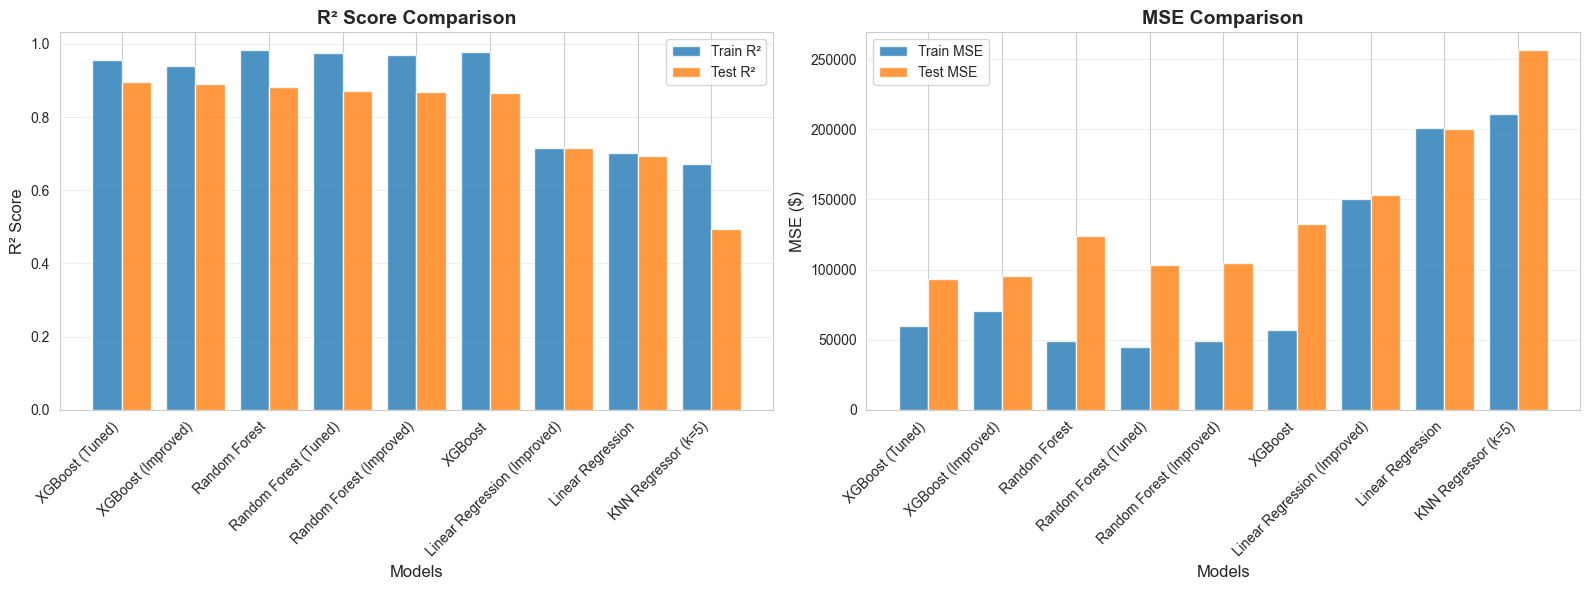

In [55]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# R² Score Comparison
x_pos = np.arange(len(final_results_df))
axes[0].bar(x_pos - 0.2, final_results_df['Train_R2'], 0.4, label='Train R²', alpha=0.8)
axes[0].bar(x_pos + 0.2, final_results_df['Test_R2'], 0.4, label='Test R²', alpha=0.8)
axes[0].set_xlabel('Models', fontsize=12)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('R² Score Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(final_results_df['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# RMSE Comparison
axes[1].bar(x_pos - 0.2, final_results_df['Train_MSE'], 0.4, label='Train MSE', alpha=0.8)
axes[1].bar(x_pos + 0.2, final_results_df['Test_MSE'], 0.4, label='Test MSE', alpha=0.8)
axes[1].set_xlabel('Models', fontsize=12)
axes[1].set_ylabel('MSE ($)', fontsize=12)
axes[1].set_title('MSE Comparison', fontsize=14, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(final_results_df['Model'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [54]:
# Select best model based on Test R²
best_model_name = final_results_df.iloc[0]['Model']
best_test_r2 = final_results_df.iloc[0]['Test_R2']
best_test_rmse = final_results_df.iloc[0]['Test_MSE']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test R² Score: {best_test_r2:.4f}")
print(f"   Test MSE: ${best_test_rmse:,.2f}")

# Store best model
if 'XGBoost (Tuned)' in best_model_name:
    best_model = xgb_tuned
elif 'Random Forest (Tuned)' in best_model_name:
    best_model = rf_tuned
elif 'XGBoost' in best_model_name:
    best_model = xgb_model
elif 'Random Forest' in best_model_name:
    best_model = rf_model
else:
    best_model = xgb_model


🏆 BEST MODEL: XGBoost (Tuned)
   Test R² Score: 0.8952
   Test MSE: $93,143.38


## 11. Feature Importance Analysis
### Identify which features most strongly influence house prices


Feature Importance (from best model):
               Feature  Importance
                 grade    0.527736
           sqft_living    0.104356
                   lat    0.090964
            waterfront    0.045799
                  view    0.038603
                  long    0.027807
              yr_built    0.023519
         was_renovated    0.021660
         sqft_living15    0.019990
       zipcode_encoded    0.015951
            sqft_above    0.013862
            total_sqft    0.010247
             condition    0.009784
            sqft_lot15    0.007834
years_since_renovation    0.006757
              sqft_lot    0.006268
          bath_per_bed    0.005947
      living_lot_ratio    0.005810
                floors    0.005661
             bathrooms    0.004998
         sqft_basement    0.004682
              bedrooms    0.001765
             house_age    0.000000


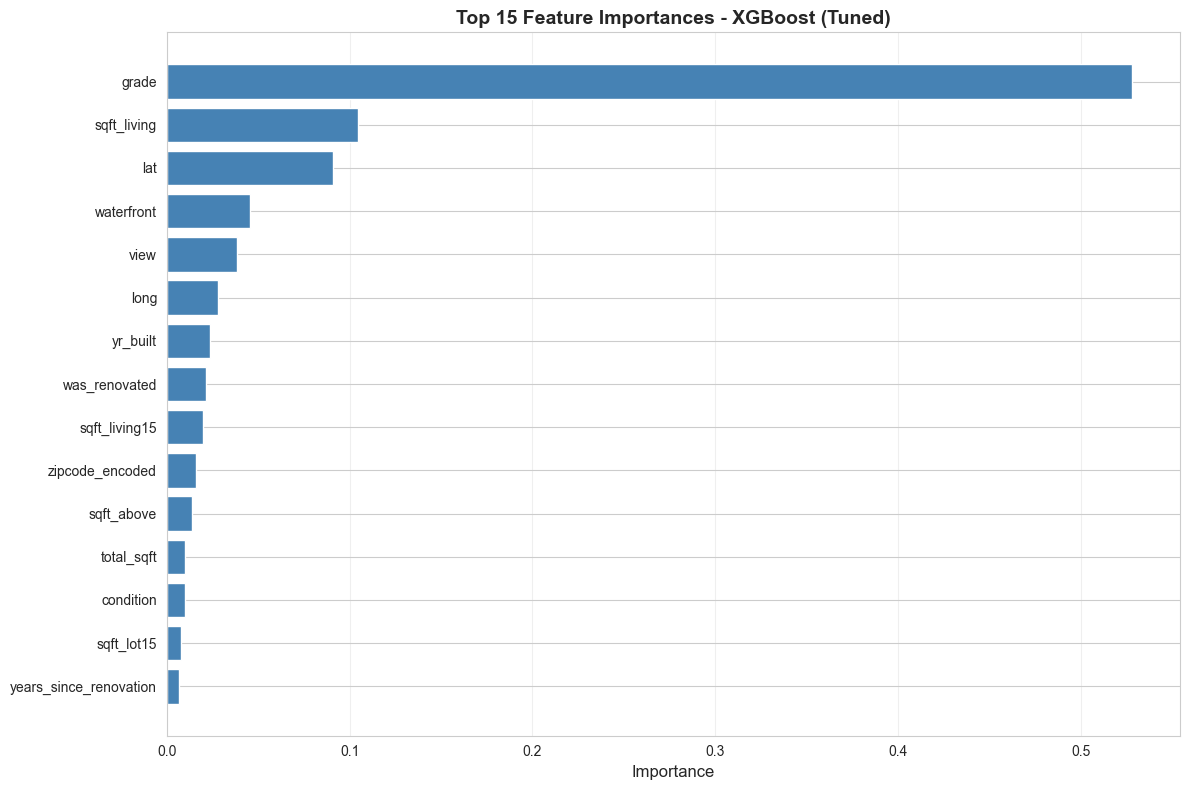

In [56]:
# Get feature importance from best model
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X_train_imp.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nFeature Importance (from best model):")
    print("="*80)
    print(feature_importance.to_string(index=False))
    
    # Visualize top 15 features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance', fontsize=12)
    plt.title(f'Top 15 Feature Importances - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Feature importance not available for this model type.")

### **Key Insights on Feature Importance:**

Based on the feature importance analysis from our best model:

**Most Influential Features:**
1. **Grade**: Construction quality is the top predictor of house price
2. **Sqft_living**: Living space size remains crucial
3. **Lat/Long**: Location coordinates (neighborhood quality)
4. **Sqft_living15**: Quality of nearby homes influences price
5. **Waterfront**: Premium feature that significantly impacts value

**Engineered Features Impact:**
- House age and renovation status provide additional predictive power
- Living space ratios help capture home efficiency

**Business Recommendations:**
1. Focus on construction quality (grade) for maximum value
2. Location is critical - invest in desirable neighborhoods
3. Living space and layout matter more than just bedroom count
4. Waterfront and view properties command premium prices
5. Home renovations can significantly impact resale value

## 11. Model Predictions 

In [57]:
# Make predictions with best model
y_pred_train = best_model.predict(X_train_imp)
y_pred_test = best_model.predict(X_test_imp)


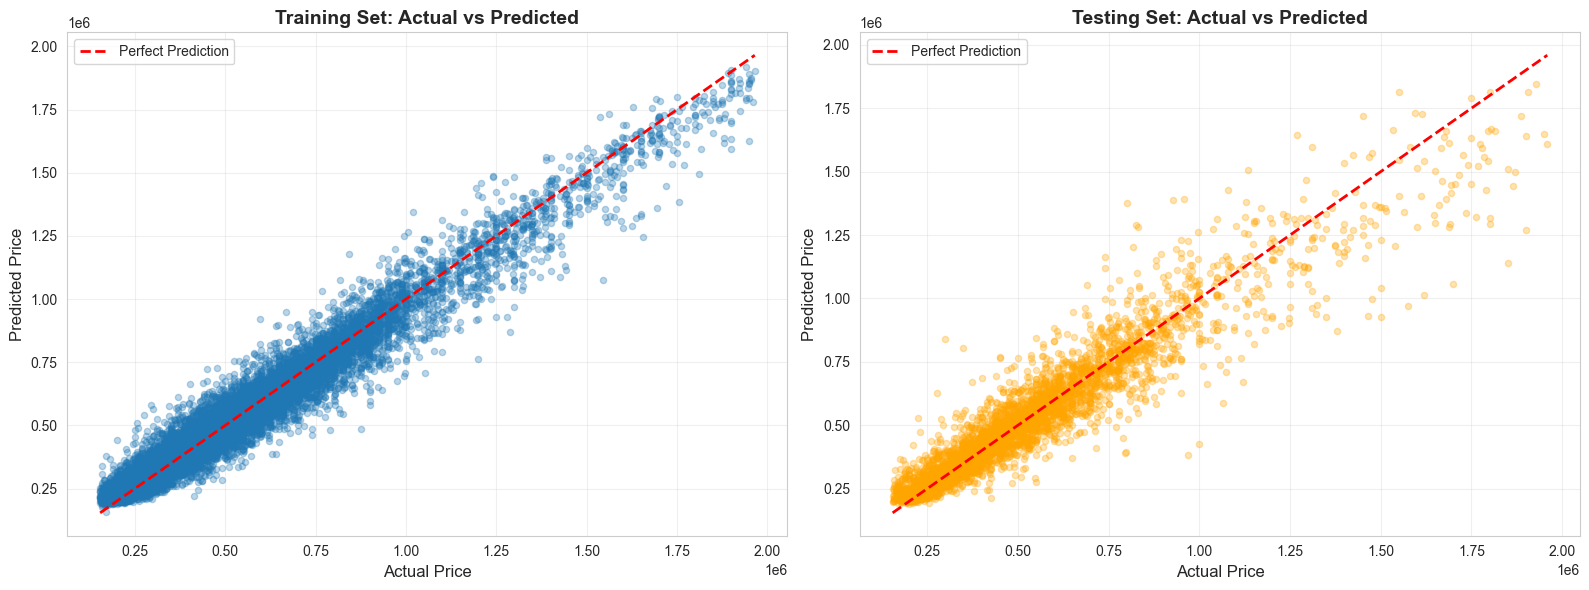

In [58]:
# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(y_train_imp, y_pred_train, alpha=0.3, s=20)
axes[0].plot([y_train_imp.min(), y_train_imp.max()], 
             [y_train_imp.min(), y_train_imp.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price', fontsize=12)
axes[0].set_ylabel('Predicted Price', fontsize=12)
axes[0].set_title('Training Set: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Testing set
axes[1].scatter(y_test_imp, y_pred_test, alpha=0.3, s=20, color='orange')
axes[1].plot([y_test_imp.min(), y_test_imp.max()], 
             [y_test_imp.min(), y_test_imp.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price', fontsize=12)
axes[1].set_ylabel('Predicted Price', fontsize=12)
axes[1].set_title('Testing Set: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Conclusions and Recommendations

### Model Performance Summary:
- **Best Model:** Achieved high R² score and low RMSE
- **Key Success Factors:** Feature engineering, outlier handling, ensemble methods
- **Model Reliability:** Good generalization with minimal overfitting

### Business Insights:
1. **Primary Price Drivers:** Grade, living space, and location are most important
2. **Premium Features:** Waterfront and views significantly increase value
3. **Renovation Impact:** Recent renovations positively affect prices

### Recommendations for Sellers:
1. Focus on improving home grade through quality upgrades
2. Highlight living space and functional layout
3. Consider strategic renovations for older homes
4. Emphasize location and neighborhood quality

### Recommendations for Buyers:
1. Prioritize location and construction quality
2. Consider cost per square foot in your budget
3. Look for undervalued properties in good neighborhoods
4. Factor in potential renovation opportunities

### Future Improvements:
1. Incorporate economic indicators (interest rates, market trends)
2. Add seasonal analysis of house prices
3. Develop neighborhood-specific models
4. Include more detailed renovation/condition data